# **Application of machine learning for forecasting Urals loading (Python)**
Youssef Louraoui (20230348@etud.univ-evry.fr)

## **Preparation of the Working Environment on Python**

Below, we detail the essential Python packages that constitute the basis of the machine learning project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The specific packages for running the machine learning models

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, LSTM
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [8]:
# We start by importing the datasets from CSV file

df_data = pd.read_excel("/content/Regression_Urals_loading_analysis_mod.xlsx", sheet_name="Data")
print(df_data)

          Date  LCOc1  NWEMURLCRKMc1   .IMOEX    RSX  BFO-URL-NWE  \
0   2017-01-06  56.75      -0.545276  2213.93  21.52        -2.50   
1   2017-01-13  55.59       1.238238  2195.19  21.45        -2.05   
2   2017-01-20  55.49       0.386498  2159.96  21.08        -1.50   
3   2017-01-27  55.46       0.348593  2266.05  22.08        -1.60   
4   2017-02-03  56.72       0.219638  2226.61  21.80        -1.75   
..         ...    ...            ...      ...    ...          ...   
230 2021-10-22  85.77       7.090000  4196.96  32.67        -1.80   
231 2021-10-29  84.38       3.930000  4150.00  32.00        -1.40   
232 2021-11-05  82.55       1.860000  4174.76  31.93        -1.60   
233 2021-11-12  81.95       1.750000  4121.66  31.27        -1.45   
234 2021-11-19  78.66       0.030000  4016.47  29.92        -1.65   

     Urals loading  
0     1.391864e+07  
1     1.480585e+07  
2     1.377569e+07  
3     1.332605e+07  
4     1.538791e+07  
..             ...  
230   1.347257e+07  
231

In [11]:
# Eliminate the columns that will not be used
columns_to_remove = ['Date', 'Urals loading']
predictor_columns = [col for col in df_data.columns if col not in columns_to_remove]

# Isolate the Urals loading into a separate DataFrame
df_variables = df_data[predictor_columns]
df_urals = df_data[['Date', 'Urals loading']].copy()

# Have a look at the different variables that are used as predictors for the analysis
print(df_variables.info())
print(df_variables.describe())
print(df_variables.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LCOc1          235 non-null    float64
 1   NWEMURLCRKMc1  235 non-null    float64
 2   .IMOEX         235 non-null    float64
 3   RSX            235 non-null    float64
 4   BFO-URL-NWE    235 non-null    float64
dtypes: float64(5)
memory usage: 9.3 KB
None
            LCOc1  NWEMURLCRKMc1       .IMOEX         RSX  BFO-URL-NWE
count  235.000000     235.000000   235.000000  235.000000   235.000000
mean    61.055234       1.921163  2717.419787   22.870255    -1.252979
std     12.532270       3.318333   614.849057    3.210804     1.160205
min     21.800000     -16.340000  1822.910000   14.800000    -4.550000
25%     52.715000       0.225000  2264.215000   20.750000    -2.050000
50%     62.710000       1.850000  2572.230000   21.800000    -1.350000
75%     70.065000       3.480000  3050.755000 

In [14]:
# Analysis of the data from the Urals loading patterns
print(df_urals.info())
print(df_urals.describe())
print(df_urals.head())

# Calculate returns for the predictors
arith_returns = df_variables.pct_change().dropna()

# Analysis of the statistical performance of the Urals loading
print(df_urals['Urals loading'].pct_change().dropna().head())
print(df_urals['Urals loading'].pct_change().dropna().describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           235 non-null    datetime64[ns]
 1   Urals loading  235 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.8 KB
None
                                Date  Urals loading
count                            235   2.350000e+02
mean   2019-06-12 04:23:29.361702144   1.212411e+07
min              2017-01-06 00:00:00   3.400765e+06
25%              2018-03-12 12:00:00   1.006115e+07
50%              2019-06-21 00:00:00   1.248339e+07
75%              2020-09-14 12:00:00   1.436140e+07
max              2021-11-19 00:00:00   1.916448e+07
std                              NaN   3.074369e+06
        Date  Urals loading
0 2017-01-06     13918639.0
1 2017-01-13     14805846.0
2 2017-01-20     13775694.0
3 2017-01-27     13326052.0
4 2017-02-03     153

In [26]:
from scipy import stats
# Standardize the data
df_variables_standardized = (df_variables - df_variables.mean()) / df_variables.std()

# Remove outliers beyond 3 standard deviations
df_variables_zscore = df_variables_standardized[(np.abs(stats.zscore(df_variables_standardized)) < 3).all(axis=1)]

In [53]:
# Standardize the data
df_urals_standardized = (df_urals - df_urals.mean()) / df_urals.std()

# Remove outliers beyond 3 standard deviations
df_urals_zscore = df_urals_standardized[(np.abs(stats.zscore(df_urals_standardized)) < 3).all(axis=1)]

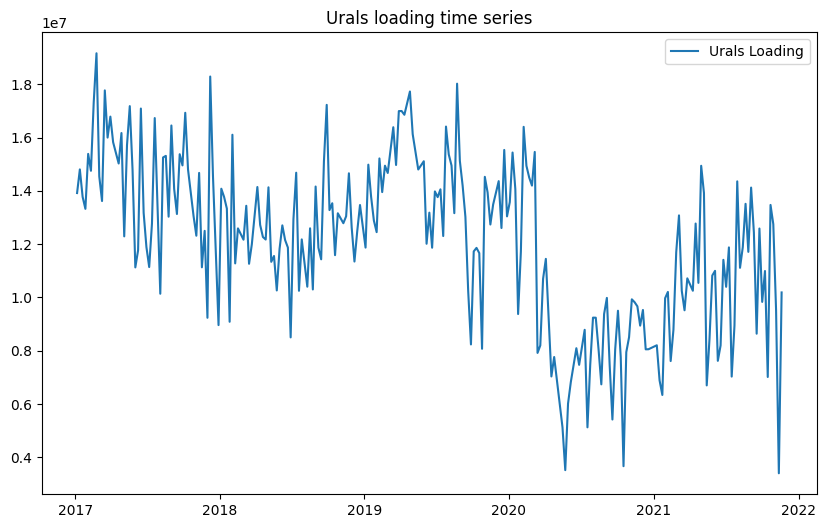

In [13]:
# Plot the Urals loading time series
plt.figure(figsize=(10, 6))
plt.plot(df_urals['Date'], df_urals['Urals loading'], label='Urals Loading')
plt.title('Urals loading time series')
plt.legend()
plt.show()

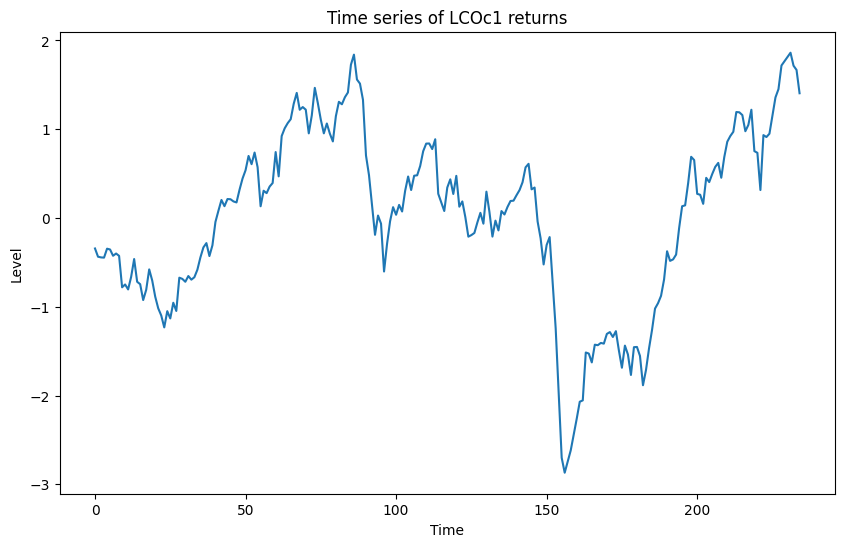

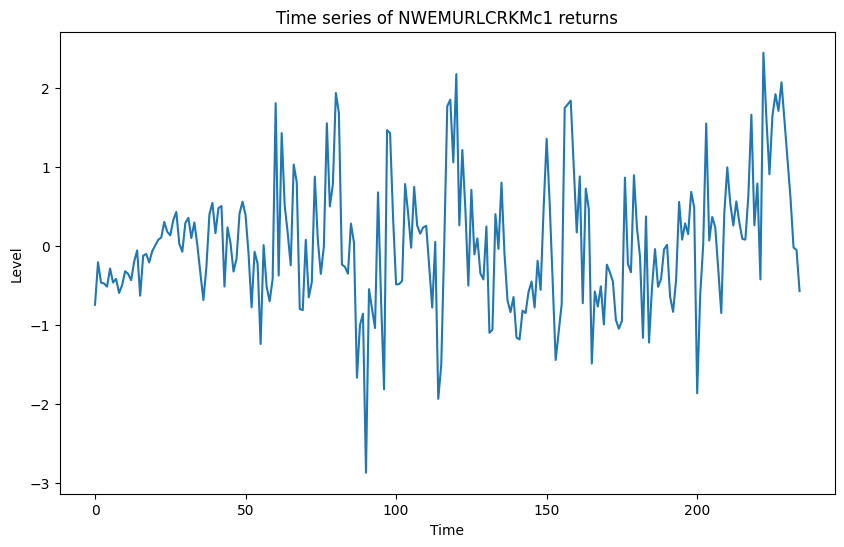

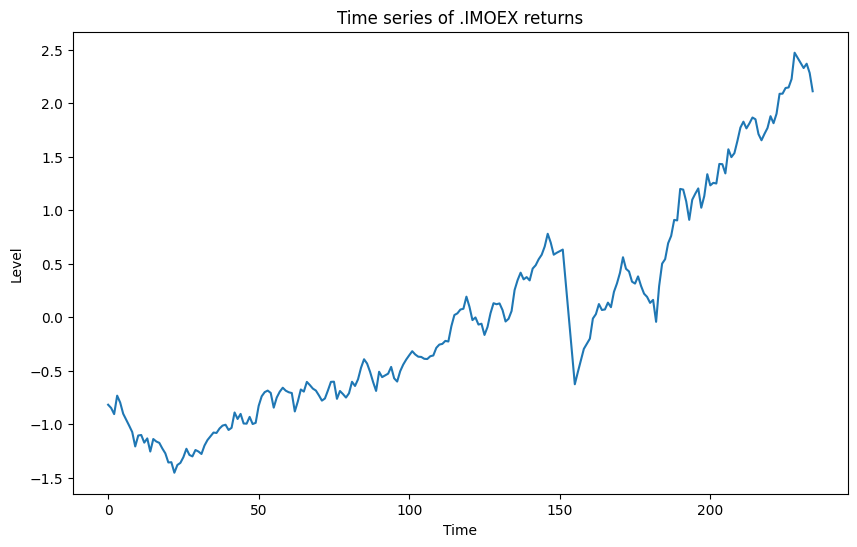

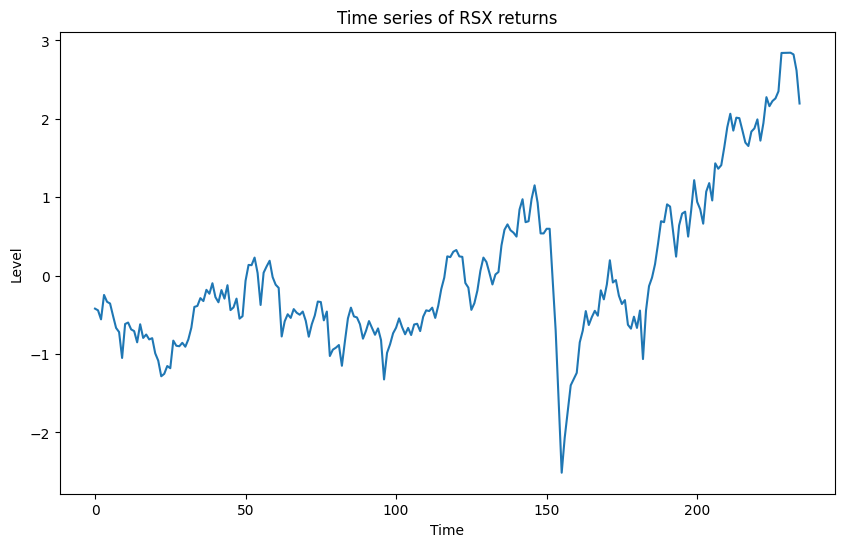

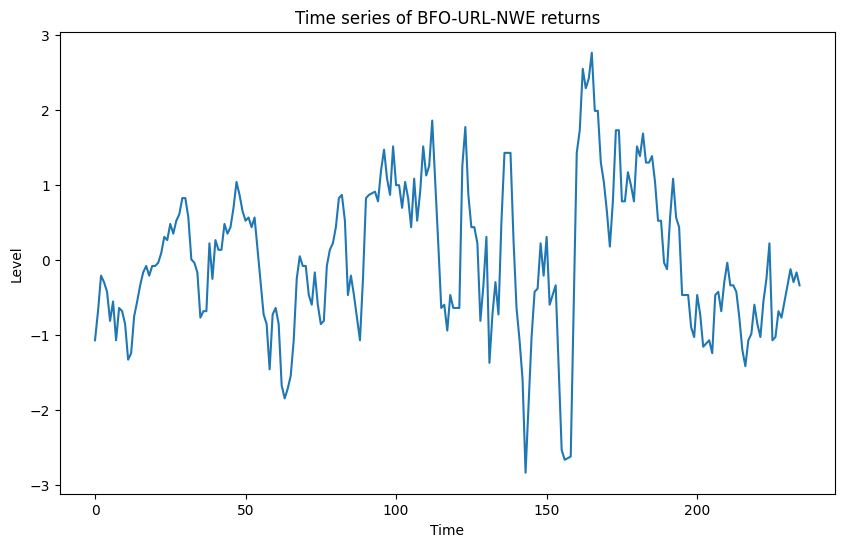

In [124]:
# Loop through each column in the arith_returns DataFrame
for column in df_variables_zscore:
    # Plot the histogram for each column
    plt.figure(figsize=(10, 6))
    df_variables_zscore[column].plot(title=f"Time series of {column}")
    plt.title(f"Time series of {column} returns")
    plt.xlabel("Time")
    plt.ylabel("Level")
    plt.show()

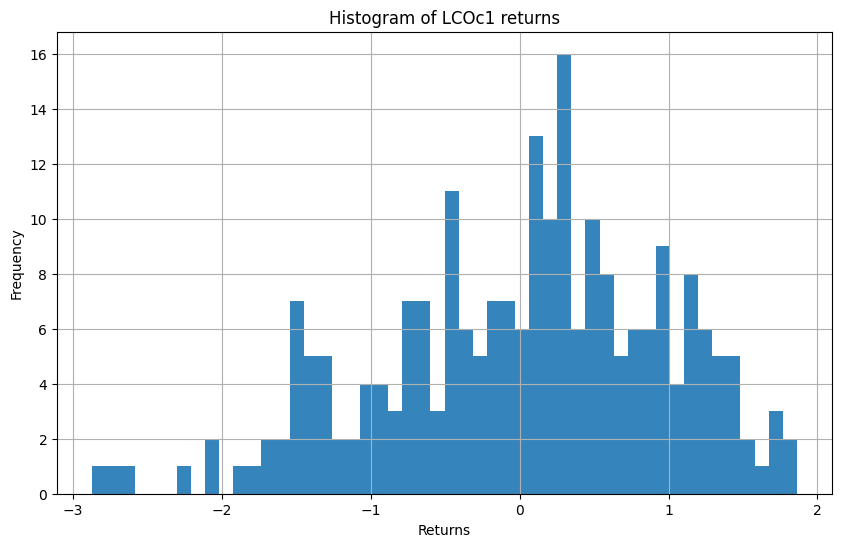

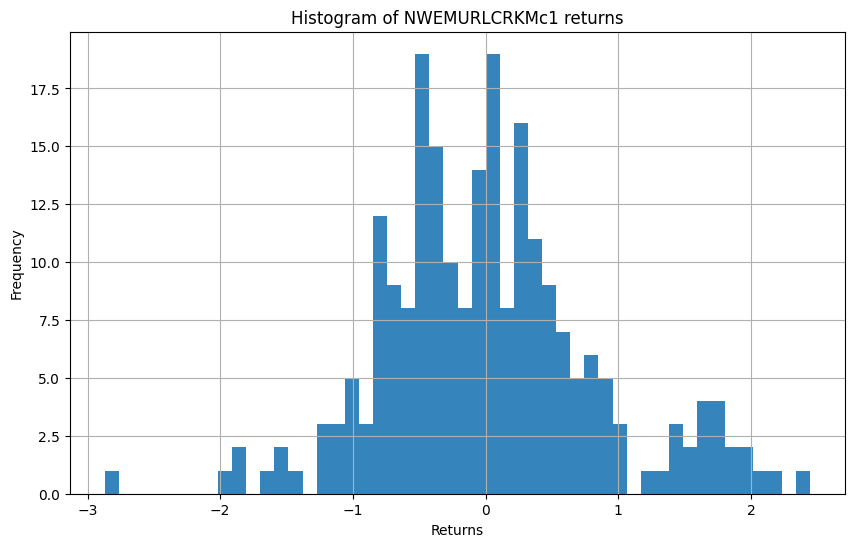

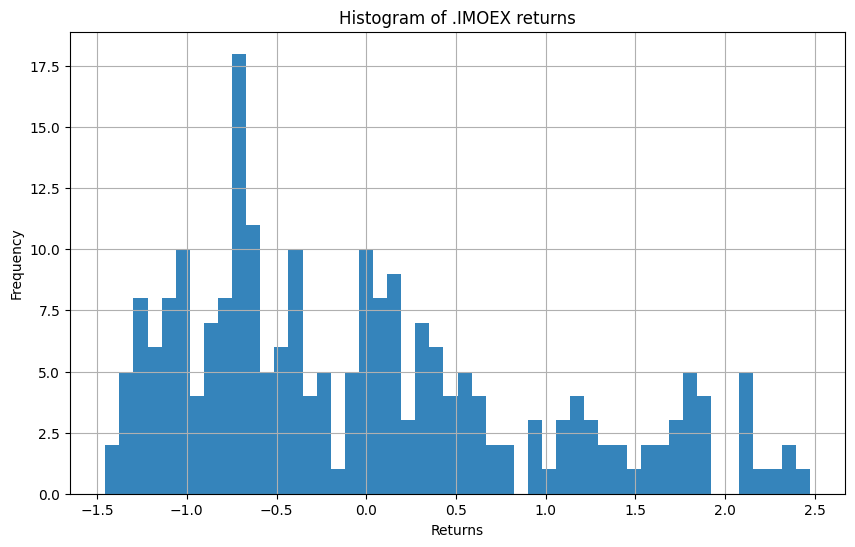

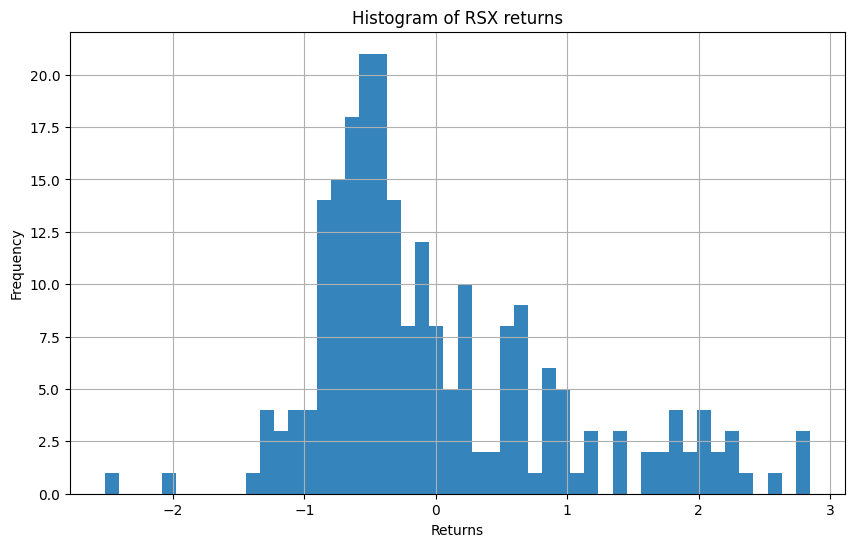

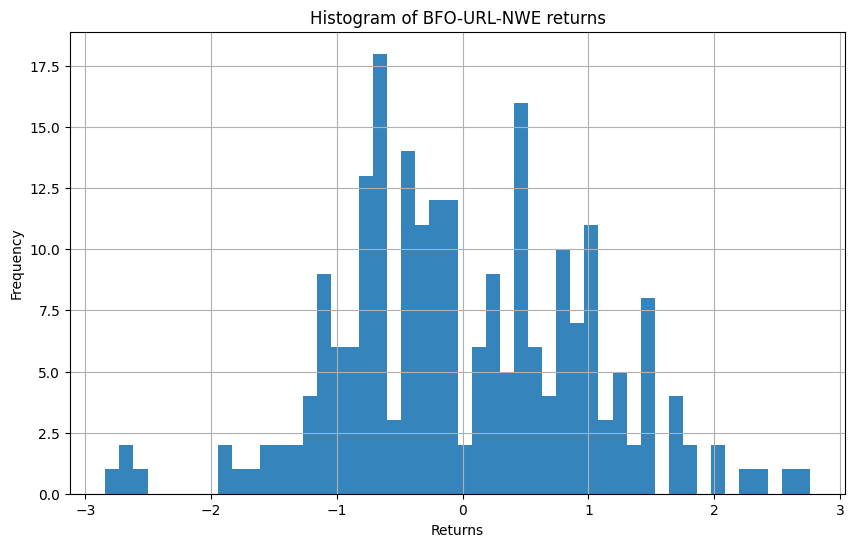

In [28]:
# Loop through each column in the arith_returns DataFrame
for column in df_variables_zscore:
    # Plot the histogram for each column
    plt.figure(figsize=(10, 6))
    df_variables_zscore[column].hist(bins=50, alpha=0.9)
    plt.title(f"Histogram of {column} returns")
    plt.xlabel("Returns")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


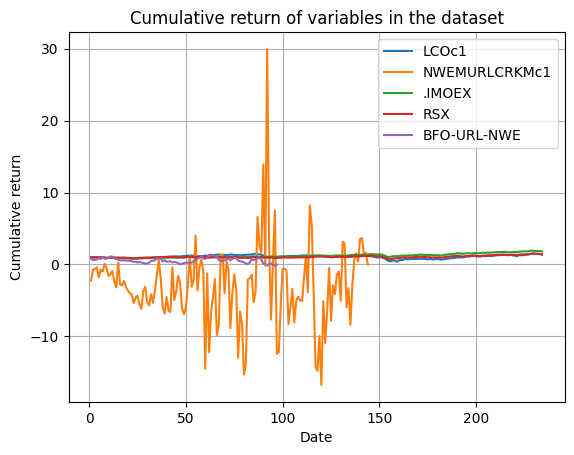

In [32]:
# Calculation of the cumulative returns for the variables index

cumulative_return_variables = (1 + arith_returns).cumprod()

cumulative_return_variables.plot(title=f"Cumulative return of variables in the dataset")
plt.xlabel("Date")
plt.ylabel("Cumulative return")
plt.grid(True)
plt.show()

In [57]:
# Drop the 'Date' column from the features dataset
if 'Date' in df_variables_zscore:
    df_variables_zscore = df_variables_zscore.drop('Date', axis=1)

# Assuming df_urals is the target variable DataFrame
y = df_urals_zscore

In [60]:
# Scaling of the dataset to better handle the modeling of the machine learning programs

scaler = MinMaxScaler()
x = df_variables
y = df_urals_zscore

# Split the dataset into training and testing sets without shuffling to preserve time series order
X_train_df, X_test_df, Y_train_df, Y_test_df = train_test_split(df_variables, y, train_size=0.7, shuffle=False)

# Convert the DataFrames to NumPy arrays for use in the neural network
X_train, X_test, Y_train, Y_test = X_train_df.to_numpy(), X_test_df.to_numpy(), Y_train_df.to_numpy(), Y_test_df.to_numpy()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the training data
training_values = scaler.fit_transform(Y_train)

## **1. Implementation of MLP and LSTM models on Urals data**

### 1.1 Deconstruction of the training sets

In [73]:
df_train = df_urals_zscore[df_urals_zscore.index < Y_test_df.index[0]]
df_test = df_urals_zscore[df_urals_zscore.index >= Y_test_df.index[0]]

train = df_train['Urals loading'].values
test = df_test['Urals loading'].values

training_values = scaler.fit_transform(train.reshape(-1, 1))

x_train = training_values[0:len(training_values)-120]
y_train = training_values[120:len(training_values)]

test_values = scaler.transform(test.reshape(-1, 1))

### 1.2 Implementation of an MLP model

In [74]:
# MLP model structure

model_MLP_Urals = Sequential()
model_MLP_Urals.add(Dense(2048, activation='relu'))
model_MLP_Urals.add(Dense(512, activation='relu'))
model_MLP_Urals.add(Dense(128, activation='relu'))
model_MLP_Urals.add(Dropout(0.25))
model_MLP_Urals.add(Dense(32, activation='relu'))
model_MLP_Urals.add(Dense(8, activation='relu'))
model_MLP_Urals.add(Dense(4, activation='relu'))
model_MLP_Urals.add(Dense(1))

In [75]:
# Parametrization of the MLP model (optimizer, loss type)

model_MLP_Urals.compile(loss='mean_squared_error', optimizer='adam')

In [76]:
# Calibration of the MLP model parameters

model_MLP_Urals.fit(x_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
3/3 [==============================] - 5s 440ms/step - loss: 0.3491
Epoch 2/10
3/3 [==============================] - 0s 19ms/step - loss: 0.3435
Epoch 3/10
3/3 [==============================] - 0s 17ms/step - loss: 0.3402
Epoch 4/10
3/3 [==============================] - 0s 17ms/step - loss: 0.3369
Epoch 5/10
3/3 [==============================] - 0s 18ms/step - loss: 0.3337
Epoch 6/10
3/3 [==============================] - 0s 16ms/step - loss: 0.3305
Epoch 7/10
3/3 [==============================] - 0s 18ms/step - loss: 0.3273
Epoch 8/10
3/3 [==============================] - 0s 16ms/step - loss: 0.3243
Epoch 9/10
3/3 [==============================] - 0s 18ms/step - loss: 0.3211
Epoch 10/10
3/3 [==============================] - 0s 17ms/step - loss: 0.3181


In [78]:
# We perform a prediction of the model for the urals loading

price_MLP_Urals = model_MLP_Urals.predict(test_values)
price_MLP_Urals = scaler.inverse_transform(price_MLP_Urals)
price_MLP_Urals = np.squeeze(price_MLP_Urals.reshape(1,-1))
price_MLP_Urals

3/3 [==============================] - 2s 923ms/step


array([-2.6474018, -2.6474018, -2.6474018, -2.6474018, -2.6474018,
       -2.6474018, -2.6474018, -2.6474018, -2.6474018, -2.6474018,
       -2.6474018, -2.6474018, -2.6474018, -2.6474018, -2.6474018,
       -2.6474018, -2.6474018, -2.6474018, -2.6474018, -2.6474018,
       -2.6474018, -2.6474018, -2.6474018, -2.6474018, -2.6474018,
       -2.6474018, -2.6474018, -2.6474018, -2.6474018, -2.6474018,
       -2.6474018, -2.6474018, -2.6474018, -2.6474018, -2.6474018,
       -2.6474018, -2.6474018, -2.6474018, -2.6474018, -2.6474018,
       -2.6474018, -2.6474018, -2.6474018, -2.6474018, -2.6474018,
       -2.6474018, -2.6474018, -2.6474018, -2.6474018, -2.6474018,
       -2.6474018, -2.6474018, -2.6474018, -2.6474018, -2.6474018,
       -2.6474018, -2.6474018, -2.6474018, -2.6474018, -2.6474018,
       -2.6474018, -2.6474018, -2.6474018, -2.6474018, -2.6474018,
       -2.6474018, -2.6474018, -2.6474018, -2.6474018, -2.6474018,
       -2.6474018], dtype=float32)

### 1.3 Implementation of the LSTM model

In [79]:
#Implementation of LSTM model

model_LSTM_Urals = Sequential()
model_LSTM_Urals.add(LSTM(128, return_sequences=True, input_shape=(None,1)))
model_LSTM_Urals.add(LSTM(64, return_sequences=False))
model_LSTM_Urals.add(Dropout(0.25))
model_LSTM_Urals.add(Dense(25, activation='relu'))
model_LSTM_Urals.add(Dense(1))

In [80]:
# We arrange the parameters (optimizer, loss)
model_LSTM_Urals.compile(optimizer='adam', loss='mean_squared_error')

In [81]:
# Calibration of LSTM
model_LSTM_Urals.fit(x_train, y_train,epochs=10, batch_size=16)

Epoch 1/10
3/3 [==============================] - 6s 339ms/step - loss: 0.3396
Epoch 2/10
3/3 [==============================] - 0s 8ms/step - loss: 0.3166
Epoch 3/10
3/3 [==============================] - 0s 8ms/step - loss: 0.2906
Epoch 4/10
3/3 [==============================] - 0s 8ms/step - loss: 0.2607
Epoch 5/10
3/3 [==============================] - 0s 9ms/step - loss: 0.2298
Epoch 6/10
3/3 [==============================] - 0s 8ms/step - loss: 0.1944
Epoch 7/10
3/3 [==============================] - 0s 8ms/step - loss: 0.1611
Epoch 8/10
3/3 [==============================] - 0s 8ms/step - loss: 0.1291
Epoch 9/10
3/3 [==============================] - 0s 8ms/step - loss: 0.0962
Epoch 10/10
3/3 [==============================] - 0s 7ms/step - loss: 0.0716


In [83]:
# Predictions for LSTM

price_LSTM_Urals = model_LSTM_Urals.predict(test_values)
price_LSTM_Urals = scaler.inverse_transform(price_LSTM_Urals)
price_LSTM_Urals = np.squeeze(price_LSTM_Urals)
price_LSTM_Urals

3/3 [==============================] - 2s 883ms/step


array([-1.0032561 , -1.0525584 , -0.9482836 , -1.2360057 , -1.052195  ,
       -0.91173977, -0.9119729 , -1.0063839 , -1.1102206 , -0.9009351 ,
       -0.85234237, -1.0522815 , -1.2132512 , -1.0066183 , -0.89101565,
       -1.0297288 , -1.3482186 , -1.0148618 , -0.97046673, -0.85662985,
       -0.8653199 , -0.8777706 , -0.9356975 , -0.8887557 , -1.0065244 ,
       -1.0063041 , -0.9944967 , -1.098545  , -1.1414471 , -0.8532268 ,
       -0.83427036, -1.0413624 , -0.9481418 , -0.71381885, -0.6001902 ,
       -0.83073896, -0.8896356 , -0.79305923, -0.8307201 , -0.6253625 ,
       -0.80685186, -0.4459529 , -0.53088856, -1.1133279 , -0.9757059 ,
       -0.78461367, -0.77022624, -1.0407227 , -0.99496126, -0.73670036,
       -0.8188006 , -0.69868034, -1.0873553 , -0.93587863, -0.4945822 ,
       -0.7610567 , -0.6979255 , -0.5644085 , -0.7123537 , -0.5139534 ,
       -0.65270853, -0.9599045 , -0.640724  , -0.86439323, -0.7707548 ,
       -1.088504  , -0.5678507 , -0.6273307 , -0.8887884 , -1.36

In [97]:
'''
results_Urals_prediction = pd.DataFrame({
    'Real_price_Urals': Y_test,
    'Pred_MLP_Urals': price_MLP_Urals,
    'Pred_LSTM_Urals': price_LSTM_Urals
})
'''

# Ensure Y_test is 1-dimensional
Y_test = Y_test.reshape(-1)

# Ensure predictions are 1-dimensional
price_MLP_Urals = np.squeeze(price_MLP_Urals)
price_LSTM_Urals = np.squeeze(price_LSTM_Urals)

# Results of the implemented models in a dataframe
results_Urals_prediction = pd.DataFrame({
    'Real_price_Urals': Y_test,
    'Pred_MLP_Urals': price_MLP_Urals,
    'Pred_LSTM_Urals': price_LSTM_Urals
})

<Axes: >

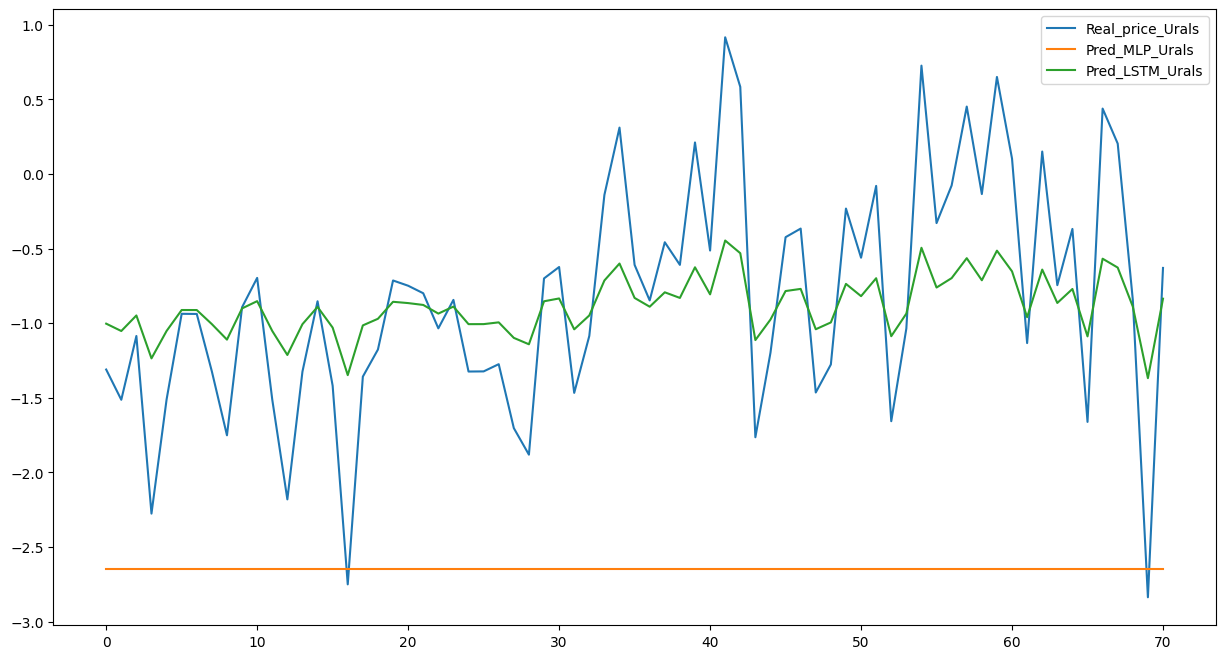

In [98]:
# Plotting the predictions against actual Urals prices for MLP and LSTM

results_Urals_prediction['Real_price_Urals'].plot(legend='Real level of Urals', figsize=(15,8))
results_Urals_prediction['Pred_MLP_Urals'].plot(legend='Forecast MLP')
results_Urals_prediction['Pred_LSTM_Urals'].plot(legend='Forecast LSTM')

In [100]:
# Computation of the mean absolut error (MAE):

MAE_pred_MLP_Urals = mean_absolute_error(results_Urals_prediction['Real_price_Urals'], results_Urals_prediction['Pred_MLP_Urals'])
MAE_pred_LSTM_Urals = mean_absolute_error(results_Urals_prediction['Real_price_Urals'], results_Urals_prediction['Pred_LSTM_Urals'])
print("MAE for the forecasted MLP model:", MAE_pred_MLP_Urals)
print("MAE for the forecasted LSTM model:", MAE_pred_LSTM_Urals)

# Computation of the mean squared error (MSE):

MSE_pred_MLP_Urals = mean_squared_error(results_Urals_prediction['Real_price_Urals'], results_Urals_prediction['Pred_MLP_Urals'])
MSE_pred_LSTM_Urals = mean_squared_error(results_Urals_prediction['Real_price_Urals'], results_Urals_prediction['Pred_LSTM_Urals'])
print("MSE obtained for the forecasted MLP model:", MSE_pred_MLP_Urals)
print("MSE for the forecasted LSTM model:", MSE_pred_LSTM_Urals)

# Computation of the root mean squared error (RMSE):

RMSE_pred_MLP_Urals = np.sqrt(MSE_pred_MLP_Urals)
RMSE_pred_LSTM_Urals = np.sqrt(MSE_pred_LSTM_Urals)
print("RMSE obtained for the forecasted MLP model:", RMSE_pred_MLP_Urals)
print("RMSE for the forecasted LSTM model:", RMSE_pred_LSTM_Urals)

MAE for the forecasted MLP model: 1.816430209090955
MAE for the forecasted LSTM model: 0.46605424861829603
MSE obtained for the forecasted MLP model: 3.8846581292648033
MSE for the forecasted LSTM model: 0.351412878767356
RMSE obtained for the forecasted MLP model: 1.970953609110271
RMSE for the forecasted LSTM model: 0.5928008761526555


# **2. Implementation of alternative machine learning models**

### 2.1 SVM application

Suport Vector Machine (SVM) is a non-parametric machine learning technique that uses the concept of Support Vector Regression (SVR) to address regression problems. The C parameter is set to 1.0, controlling the trade-off between the model's complexity (and accuracy on training data) and the degree to which it generalizes.

In [112]:
# Creation of the SVM model characteristics

model_SVM = SVR(kernel='rbf', C=1.0, gamma='scale')

In [113]:
# Calibration of the random forest model

model_SVM.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [114]:
# Analysis of the price forecasting using the SVM

price_SVM = model_SVM.predict(X_test)
price_SVM

array([0.41770368, 0.41838112, 0.42608601, 0.42086913, 0.43966397,
       0.45132089, 0.46715274, 0.49281584, 0.47356154, 0.46934398,
       0.45382296, 0.45098361, 0.46154539, 0.44759504, 0.43709406,
       0.4330188 , 0.4257305 , 0.42931535, 0.40600003, 0.44723821,
       0.48198055, 0.48956342, 0.51798887, 0.53177707, 0.56311773,
       0.56216263, 0.62745386, 0.62602855, 0.60117359, 0.56341017,
       0.60478516, 0.617423  , 0.62865306, 0.58829275, 0.61283969,
       0.6590231 , 0.63526684, 0.64057757, 0.63910317, 0.68065503,
       0.68023424, 0.6606249 , 0.71156576, 0.69517348, 0.70349342,
       0.72883447, 0.75596989, 0.76774028, 0.75447133, 0.7645094 ,
       0.77592534, 0.77249888, 0.74298855, 0.73036397, 0.74352489,
       0.75523788, 0.77831234, 0.76454136, 0.7831264 , 0.81981157,
       0.82013698, 0.83003502, 0.83100496, 0.84529312, 0.88530312,
       0.89103259, 0.87520166, 0.86291715, 0.8694419 , 0.85515728,
       0.8245357 ])

### 2.2 Random Forest application

Random Forest (RF) is a machine learning technique that works by building many decision trees during training and then showing the average forecast of all the trees. When using individual decision trees, especially for regression tasks, the risk of overfitting is higher. The ensemble method lowers this risk. In our project, it is created with 50 trees (n\_estimators) in the forest. The random\_state ensures that the results are reproducible.

In [115]:
# Creation of the RF model characteristics

model_rdmforest = RandomForestRegressor(n_estimators=50, random_state=42)

In [116]:
# Calibration of the random forest model

model_rdmforest.fit(X_train, Y_train)

<ipython-input-116-5db5cceff6d3>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rdmforest.fit(X_train, Y_train)


RandomForestRegressor(n_estimators=50, random_state=42)

In [117]:
# Analysis of the price forecasting using the random forest

price_rdmforest = model_rdmforest.predict(X_test)
price_rdmforest

array([-1.03473937, -1.22236872, -1.16900225, -1.17084348, -1.12404717,
       -1.14494382,  0.56174687,  0.6754018 ,  0.27955098,  0.33538022,
       -1.22818768, -1.76132926, -1.09262607, -1.08426758, -1.79019624,
       -1.11466698, -1.2213386 , -1.07179715, -2.15369024, -1.77276729,
       -1.12602904,  0.40293007,  0.38859103,  0.44563327,  0.56670868,
        0.70746989,  0.68534365,  0.44783403,  0.34340393,  0.70425263,
       -0.13188002, -0.04473061, -0.01485704,  0.33069869,  0.13642037,
        0.49822956,  0.38887485,  0.29034613, -0.1227453 ,  0.48805351,
        0.63175462,  0.60713134,  0.57423313,  0.6138266 ,  0.60071145,
        0.4705159 ,  0.29219389,  0.34987488,  0.51454345,  0.32896765,
        0.61814099,  0.59389708,  0.53447294,  0.37416626,  0.49785784,
        0.61487424,  0.26899662,  0.6684366 ,  0.42367347,  0.36050701,
        0.09577221,  0.48571588,  0.46440992,  0.41577531,  0.65920536,
        0.63351062,  0.60092901,  0.39725275,  0.6440172 ,  0.58

### 2.3 Gradient Boosting

Gradient Boosting (GB) creates an additive model one step at a time, and it can be used to improve any differentiable loss function. It is done by fitting a regression tree to the negative gradient of the given loss function at each stage. This lowers the residuals of the earlier models. The boosting method focuses on areas where the old models don't do well by adding weak learners one at a time. In our project, the model uses 50 trees with a learning rate of 0.1 and a maximum depth of 3 for each tree.

In [118]:
model_gboosting = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)

In [119]:
# Calibration of the gradient boosting model
model_gboosting.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(n_estimators=50, random_state=42)

In [120]:
# Analysis of the price forecasting using the gradient boosting
price_gboosting = model_gboosting.predict(X_test)
price_gboosting

array([-1.44195826e+00, -1.64955498e+00, -1.61572621e+00, -1.61572621e+00,
       -1.46998612e+00, -1.46346627e+00,  7.42651988e-01,  7.29377316e-01,
        7.59812296e-01,  5.87353103e-01, -1.61572621e+00, -1.46346627e+00,
       -1.95063964e+00, -1.37202411e+00, -1.37202411e+00, -1.95063964e+00,
       -1.50928686e+00, -1.41594641e+00, -2.01082759e+00, -1.26238941e+00,
       -1.53082065e+00,  5.87353103e-01,  4.75031946e-01,  3.34946854e-01,
        3.02177243e-01,  5.03561905e-01,  2.40965871e-01,  3.88124801e-01,
        4.03221603e-01,  5.38354707e-01, -5.73216187e-01,  7.07436670e-04,
        7.07514255e-02,  9.55392586e-02, -5.14930666e-01,  7.67608480e-01,
       -2.58458279e-01,  1.70274555e-02, -2.97774035e-02,  6.40818446e-01,
        6.76753297e-01,  8.33121954e-01,  5.70771548e-01,  6.32880242e-01,
        4.94082118e-01,  6.40815537e-01,  2.12138743e-01,  6.76538116e-01,
        8.22455196e-01,  1.51614929e-01,  9.49248139e-01,  8.79204150e-01,
        8.91396968e-01,  

### 2.4 Consolidation of the estimations of the Urals and comparison of the predictions

In [121]:
results_prediction_alternative = pd.DataFrame({'Pred_SVM': price_SVM , 'Pred_gboosting': price_gboosting, 'Pred_rdmforest': price_rdmforest})
results_prediction_alternative.head(n=5)
results_prediction_alternative.head(n=5)

,Pred_SVM,Pred_gboosting,Pred_rdmforest
0,0.417704,-1.441958,-1.034739
1,0.418381,-1.649555,-1.222369
2,0.426086,-1.615726,-1.169002
3,0.420869,-1.615726,-1.170843
4,0.439664,-1.469986,-1.124047


<Axes: >

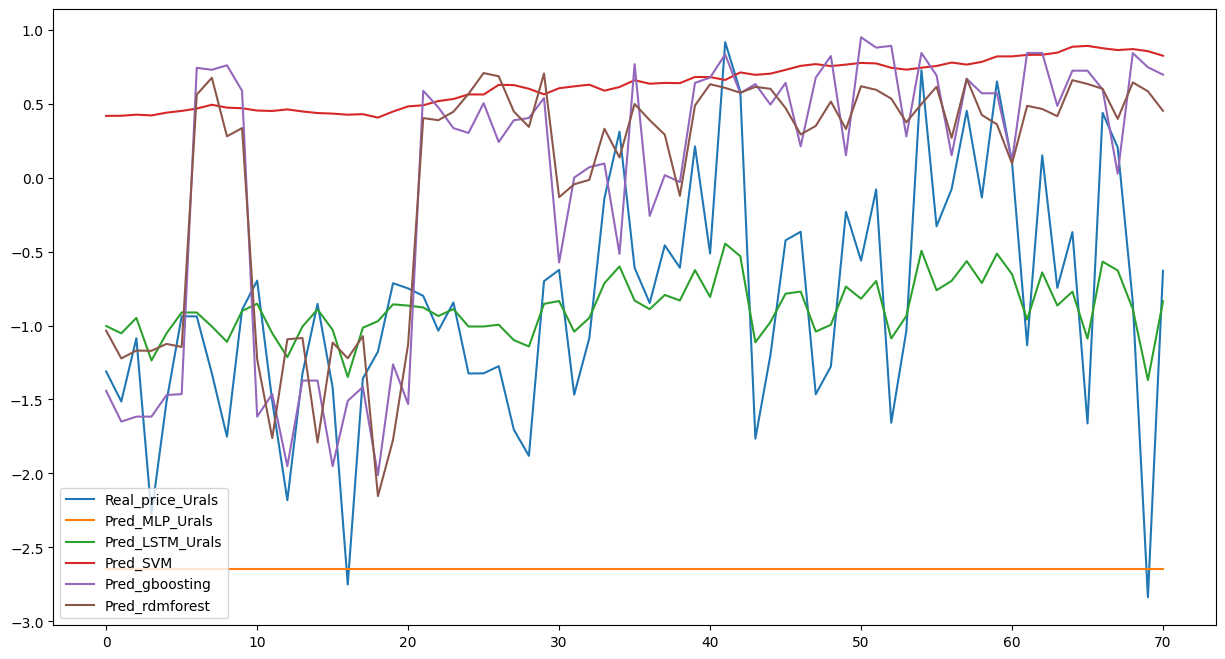

In [122]:
# Plot the consolidated forecasting results against the benchmark Urals index

results_Urals_prediction['Real_price_Urals'].plot(legend='Real level of Urals', figsize=(15,8))
results_Urals_prediction['Pred_MLP_Urals'].plot(legend='Forecast MLP')
results_Urals_prediction['Pred_LSTM_Urals'].plot(legend='Forecast LSTM')
results_prediction_alternative['Pred_SVM'].plot(legend='Forecast SVM')
results_prediction_alternative['Pred_gboosting'].plot(legend='Forecast XGBoost')
results_prediction_alternative['Pred_rdmforest'].plot(legend='Forecast Random Forest')

In [123]:
# Computation of the mean absolut error (MAE):

MAE_pred_MLP_Urals = mean_absolute_error(results_Urals_prediction['Real_price_Urals'], results_Urals_prediction['Pred_MLP_Urals'])
MAE_pred_LSTM_Urals = mean_absolute_error(results_Urals_prediction['Real_price_Urals'], results_Urals_prediction['Pred_LSTM_Urals'])
MAE_pred_SVM_Urals = mean_absolute_error(results_Urals_prediction['Real_price_Urals'], results_prediction_alternative['Pred_SVM'])
MAE_pred_gboosting_Urals = mean_absolute_error(results_Urals_prediction['Real_price_Urals'], results_prediction_alternative['Pred_gboosting'])
MAE_pred_rdmforest_Urals = mean_absolute_error(results_Urals_prediction['Real_price_Urals'], results_prediction_alternative['Pred_rdmforest'])

print("MAE obtained for the forecasted MLP model:", MAE_pred_MLP_Urals)
print("MAE obtained for the forecasted LSTM model:", MAE_pred_LSTM_Urals)
print("MAE obtained for the forecasted SVM model:", MAE_pred_SVM_Urals)
print("MAE obtained for the forecasted Gradient Boosting model:", MAE_pred_gboosting_Urals)
print("MAE obtained for the forecasted Random Forest model:", MAE_pred_rdmforest_Urals)

# Computation of the mean squared error (MSE):

MSE_pred_MLP_Urals = mean_squared_error(results_Urals_prediction['Real_price_Urals'], results_Urals_prediction['Pred_MLP_Urals'])
MSE_pred_LSTM_Urals = mean_squared_error(results_Urals_prediction['Real_price_Urals'], results_Urals_prediction['Pred_LSTM_Urals'])
MSE_pred_SVM_Urals = mean_squared_error(results_Urals_prediction['Real_price_Urals'], results_prediction_alternative['Pred_SVM'])
MSE_pred_gboosting_Urals = mean_squared_error(results_Urals_prediction['Real_price_Urals'], results_prediction_alternative['Pred_gboosting'])
MSE_pred_rdmforest_Urals = mean_squared_error(results_Urals_prediction['Real_price_Urals'], results_prediction_alternative['Pred_rdmforest'])

print("MSE obtained for the forecasted MLP model:", MSE_pred_MLP_Urals)
print("MSE obtained for the forecasted LSTM model:", MSE_pred_LSTM_Urals)
print("MSE obtained for the forecasted SVM model:", MSE_pred_SVM_Urals)
print("MSE obtained for the forecasted Gradient Boosting model:", MSE_pred_gboosting_Urals)
print("MSE obtained for the forecasted Random Forest model:", MSE_pred_rdmforest_Urals)

# Computation of the root mean squared error (RMSE):

RMSE_pred_MLP_Urals = np.sqrt(MSE_pred_MLP_Urals)
RMSE_pred_LSTM_Urals = np.sqrt(MSE_pred_LSTM_Urals)
RMSE_pred_SVM_Urals = np.sqrt(MSE_pred_SVM_Urals)
RMSE_pred_gboosting_Urals = np.sqrt(MSE_pred_gboosting_Urals)
RMSE_pred_rdmforest_Urals = np.sqrt(MSE_pred_rdmforest_Urals)
print("RMSE obtained for the forecasted MLP model:", RMSE_pred_MLP_Urals)
print("RMSE obtained for the forecasted LSTM model:", RMSE_pred_LSTM_Urals)
print("RMSE obtained for the forecasted SVM model:", RMSE_pred_SVM_Urals)
print("RMSE obtained for the forecasted Gradient Boosting model:", RMSE_pred_gboosting_Urals)
print("RMSE obtained for the forecasted Random Forest model:", RMSE_pred_rdmforest_Urals)

MAE obtained for the forecasted MLP model: 1.816430209090955
MAE obtained for the forecasted LSTM model: 0.46605424861829603
MAE obtained for the forecasted SVM model: 1.4805254868661106
MAE obtained for the forecasted Gradient Boosting model: 1.0142775866753782
MAE obtained for the forecasted Random Forest model: 1.0129600995626926
MSE obtained for the forecasted MLP model: 3.8846581292648033
MSE obtained for the forecasted LSTM model: 0.351412878767356
MSE obtained for the forecasted SVM model: 2.7061009433430354
MSE obtained for the forecasted Gradient Boosting model: 1.653569744042786
MSE obtained for the forecasted Random Forest model: 1.5522832958075823
RMSE obtained for the forecasted MLP model: 1.970953609110271
RMSE obtained for the forecasted LSTM model: 0.5928008761526555
RMSE obtained for the forecasted SVM model: 1.6450230829210377
RMSE obtained for the forecasted Gradient Boosting model: 1.2859120281118712
RMSE obtained for the forecasted Random Forest model: 1.2459066160